### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [29]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('employee.csv')
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [4]:
df.shape

(9, 7)

In [5]:
df.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Josh Wills,NaN,NaN,F,Finance,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


### 2. Reset the index as "name" as the index.

In [6]:
df.set_index(['name'], inplace = True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
df.loc[["Jack Morgan", "Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [13]:
df[(df['department'] == 'Sales') | (df['department'] == 'Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [10]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [11]:
df[(df['performance_score'] < 700) & (df['performance_score'] > 500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [12]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [23]:
df['age'].fillna(df['age'].median(), inplace = True)
df['income'].fillna(df['income'].median(),inplace=True)

In [24]:
df['gender'].fillna('M', inplace = True)

In [22]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

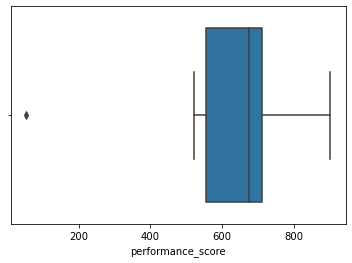

In [32]:
sns.boxplot(df['performance_score'])

In [36]:
Q1 = np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in df['performance_score']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
outlier  

[53]

In [37]:
outlier_data = df['performance_score'] < low_limit
df.loc[outlier_data]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52857.142857,F,Operations,G3,53


Since the performance score is very low, we replace it with median value of grade 3 performance score.

In [38]:
df[df['grade']=='G3']['performance_score'].median()
df['performance_score'].replace({53 : 649},inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,M,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,M,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.

In [41]:
# Dummy Encoding
df1=pd.get_dummies(df,columns=['gender'])
df1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,0,1
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,0,1
James Authur,54.0,52857.142857,Operations,G3,649,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


### 10. Do the standard scaling on the feature performance score.

In [42]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(df[['performance_score']])
df['performance_score']=scaled_data
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,M,Operations,G3,0.448014
S Kumar,45.0,16000.000000,F,Finance,G0,-1.524328
Jack Morgan,32.0,35000.000000,M,Finance,G2,-0.028068
Ying Chin,45.0,65000.000000,F,Sales,G3,-1.174553
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,0.331423
Satyam Sharma,45.0,62000.000000,M,Sales,G3,-0.270968
James Authur,54.0,52857.142857,F,Operations,G3,-0.270968
Josh Wills,54.0,52000.000000,F,Finance,G3,2.177457
Leo Duck,23.0,98000.000000,M,Sales,G4,0.311991
